<a href="https://colab.research.google.com/github/YoonHyeJu/project1/blob/master/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

In [5]:
#tensorflow와 keras 임포트
import tensorflow as tf
from tensorflow import keras

In [6]:
#헬퍼 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
print(train_images.shape)

(60000, 28, 28)


In [11]:
print(train_labels.shape)

(60000,)


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

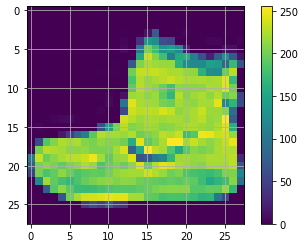

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [14]:
train_images = train_images/255.
test_images = test_images/255.

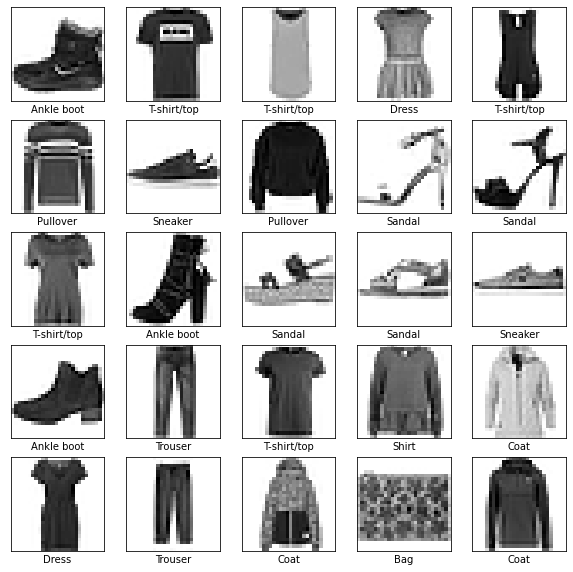

In [15]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#metrics: 훈련 단계와 테스트 단계를 모니터링하기 위해 사용

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4979 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2946 - accuracy: 0.8914


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도: ', test_acc)

313/313 - 1s - loss: 0.3472 - accuracy: 0.8776

테스트 정확도:  0.8776000142097473


테스트 세트의 정확도가 낮아진 이유:
과대적합(overfitting) 때문

In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([1.4768810e-05, 1.8489218e-09, 2.8289223e-05, 5.2388649e-09,
       6.1807350e-06, 5.1986263e-03, 1.7474587e-05, 1.8248774e-02,
       6.1248738e-06, 9.7647971e-01], dtype=float32)

In [23]:
np.argmax(predictions[0]) #가장 신뢰도를 가진 label 찾기

9

In [24]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                         100*np.max(predictions_array), 
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_lable = np.argmax(predictions_array)

    thisplot[predicted_lable].set_color('red')
    thisplot[true_label].set_color('blue')


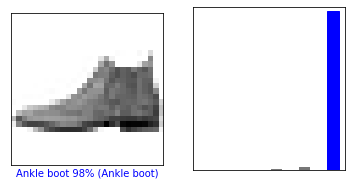

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction, test_labels)
plt.show()

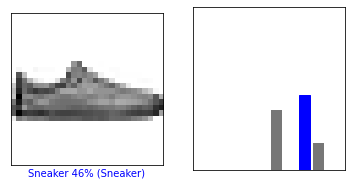

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction, test_labels)
plt.show()

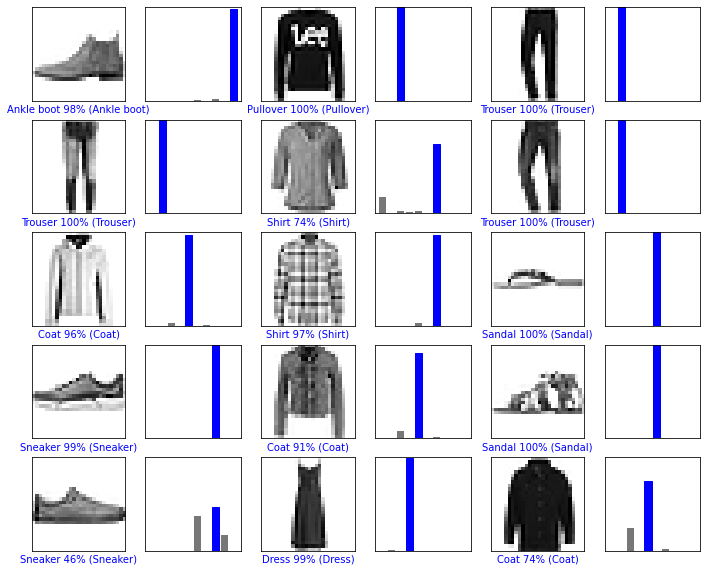

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [41]:
img = test_images[0]

print(img.shape)

(28, 28)


In [42]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.4768810e-05 1.8489218e-09 2.8289223e-05 5.2388747e-09 6.1807350e-06
  5.1986221e-03 1.7474569e-05 1.8248748e-02 6.1248620e-06 9.7647971e-01]]


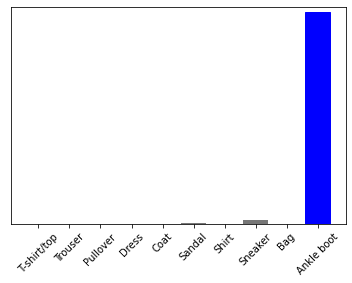

In [44]:
plot_value_array(0,predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [45]:
np.argmax(predictions_single[0])

9